In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [41]:
#import crash data. Set low_memory as false because of mixed data column
rawCrash = pd.read_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/Crashes_in_DC.csv'
                      , low_memory=False)

In [42]:
#viewing data. 
pd.set_option('display.max_columns', None)
rawCrash.head(3)

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,FROMDATE,TODATE,MARID,ADDRESS,LATITUDE,LONGITUDE,XCOORD,YCOORD,WARD,EVENTID,MAR_ADDRESS,MAR_SCORE,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS,PEDESTRIANSIMPAIRED,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,BLOCKKEY,SUBBLOCKKEY,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER
0,-76.927085,38.894377,192957077,27991659,19050656,2019/03/26 13:33:18+00,12029642,534.43,18.93,615.0,14930.0,2019/03/26 04:00:00+00,1970/01/01 00:00:00+00,44982,274 DIVISION AVENUE NE,38.894518,-76.927255,406310.624,136299.237,Ward 7,{354DD7E1-A9A2-4240-9185-A3F4906C2228},274 DIVISION AVENUE NE,200.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12024242,CLOUD PL NE,13.10,South,NaN,1970/01/01 00:00:00+00,38.894415,-76.927293,406307.42,136287.79,6fd11860be76867493da2ec98468c769,6fd11860be76867493da2ec98468c769,0,0,0,0
1,-77.036396,38.960467,192957078,27715972,18102625,2018/06/24 03:49:07+00,11001602,6713.71,3.26,8029.0,8915.0,2018/06/23 04:00:00+00,1970/01/01 00:00:00+00,256118,5800 16TH STREET NW,38.960164,-77.036781,396812.190,143584.581,Ward 4,{17DE2546-EE88-4444-AFF1-950425DC1621},5800 16TH STREET NW,200.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11064872,NICHOLSON ST NW,32.57,North,NaN,1970/01/01 00:00:00+00,38.960459,-77.036431,396812.23,143604.39,3daa93cf853638a89321f921106cf299,3daa93cf853638a89321f921106cf299,0,0,0,0
2,-76.958738,38.896709,192957079,27715973,18102602,2018/06/24 04:05:53+00,12015342,2289.58,5.17,1272.0,12308.0,2018/06/23 04:00:00+00,1970/01/01 00:00:00+00,301049,3400 BENNING ROAD NE,38.896477,-76.951464,404210.372,136515.268,Ward 7,{1F2C12F2-A876-4219-B39E-2C8A3FAB41D7},3400 BENNING ROAD NE,200.0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,1,0,0,1,12003402,34TH ST NE,109.14,West,NaN,1970/01/01 00:00:00+00,38.896747,-76.958724,404151.99,136570.94,51e1a4cc02033e1dd539bd6fdc0aaa57,bb461ebff117b1dad0d1e7163a274fdb,0,0,1,0


In [43]:
#number of rows and columns
rows = len(rawCrash.axes[0])
cols = len(rawCrash.axes[1])
print("Number of rows: ", rows)
print("Number of columns: ", cols)

#no dupes in rawCrash
rduplicate = rawCrash.duplicated()
print("number of dupes in data:",rduplicate.sum())

Number of rows:  245136
Number of columns:  60
number of dupes in data: 0


In [44]:
print("there are",len(rawCrash.columns), "columns in the data")
print(rawCrash.columns)

there are 60 columns in the data
Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDL

In [45]:
#droping the columns we won't likely use. Mosty location data. 
variables = ['REPORTDATE']
crash = rawCrash.loc[:,variables]

#converting date variables to datetime data types. Making new variables for day, month, hour, year
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])
crash['CrashCount'] = 1
crash['Hour'] = crash['REPORTDATE'].dt.hour
crash['Day'] = crash['REPORTDATE'].dt.day
crash['Month'] = crash['REPORTDATE'].dt.month
crash['Year'] = crash['REPORTDATE'].dt.year

#Limit crash data to 2015-2019 to match the weather data range
crash2 = crash.loc[(crash['REPORTDATE'].dt.year >2015) & (crash['REPORTDATE'].dt.year < 2020)]


In [46]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245136 entries, 0 to 245135
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   REPORTDATE  245136 non-null  datetime64[ns, UTC]
 1   CrashCount  245136 non-null  int64              
 2   Hour        245136 non-null  int64              
 3   Day         245136 non-null  int64              
 4   Month       245136 non-null  int64              
 5   Year        245136 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 11.2 MB


In [47]:
#number of rows and columns
rows = len(crash2.axes[0])
cols = len(crash2.axes[1])
print("Number of rows: ", rows)
print("Number of columns: ", cols)

#no dupes in rawCrash
rduplicate2 = crash2.duplicated()
print("number of dupes in data:",rduplicate2.sum())

Number of rows:  106422
Number of columns:  6
number of dupes in data: 52


In [48]:
#checking for null values. Very little and mostly in address and ward which is not too concerning, 
#dropped address from and to date
null = crash.isnull().sum()
print(null)

REPORTDATE    0
CrashCount    0
Hour          0
Day           0
Month         0
Year          0
dtype: int64


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

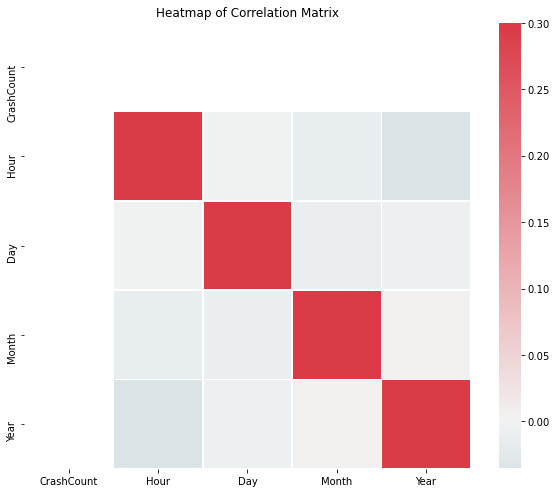

In [49]:
# Heatmap of features
corr = crash2.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

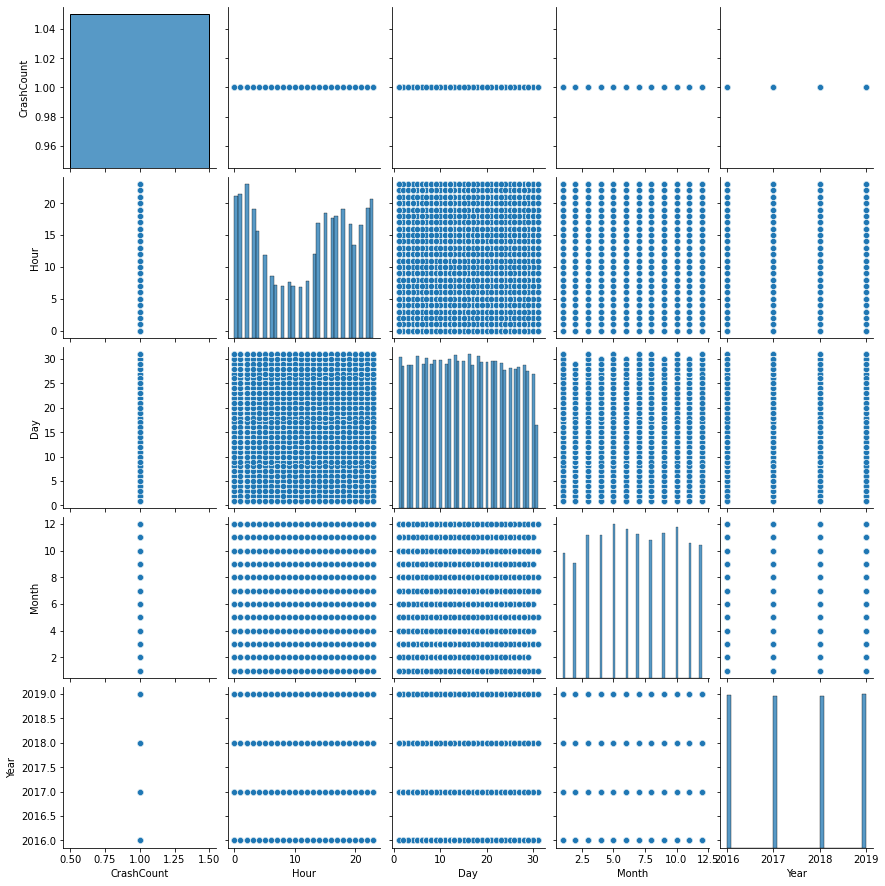

In [52]:
sns.pairplot(crash2)

In [53]:
#checking shape to make sure correct number of columns were dropped
crash2.shape
crash2.max()

REPORTDATE    2019-12-31 23:59:56+00:00
CrashCount                            1
Hour                                 23
Day                                  31
Month                                12
Year                               2019
dtype: object

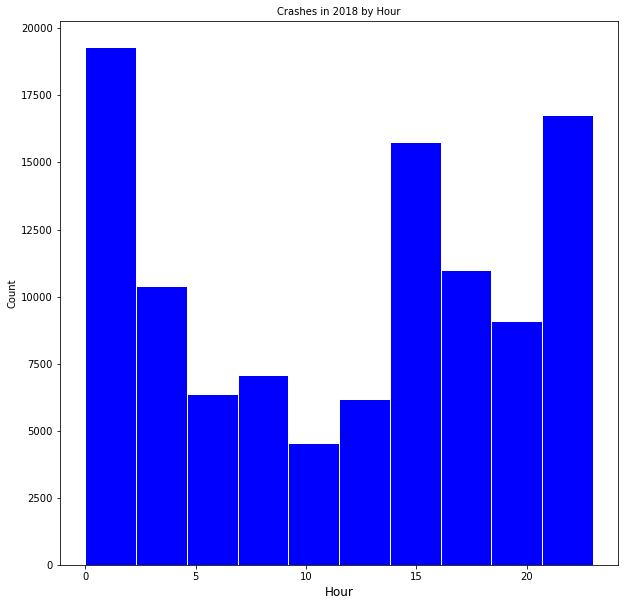

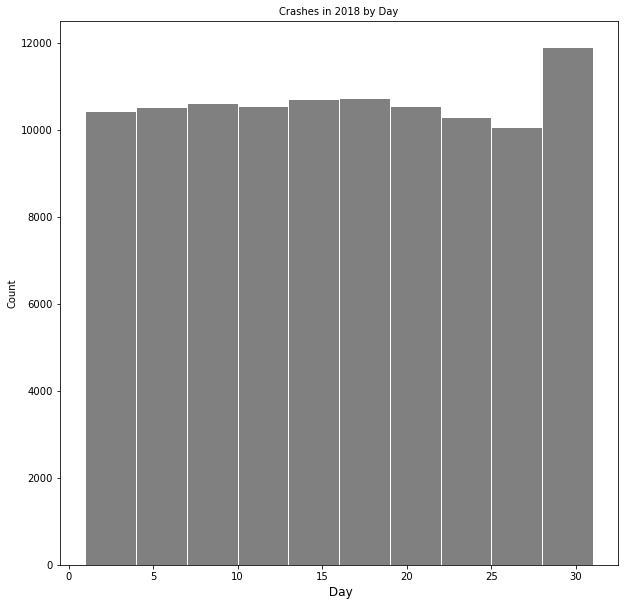

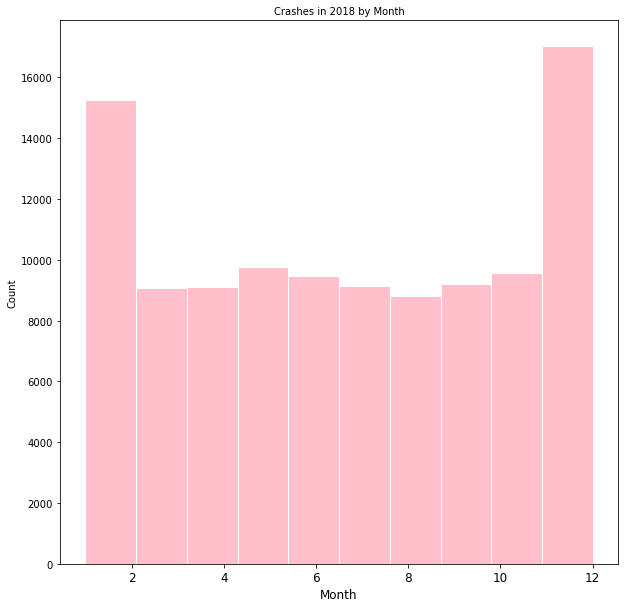

In [54]:
#Histogram of hours
fig = plt.figure(figsize=(10,10))
plt.hist(crash2['Hour'], color = 'Blue',edgecolor = 'white')
plt.title('Crashes in 2018 by Hour', color = 'Black', size = 10)
plt.xlabel('Hour', size= 12)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Days
fig = plt.figure(figsize=(10,10))
plt.hist(crash2['Day'], color = 'Grey',edgecolor = 'white')
plt.title('Crashes in 2018 by Day', color = 'Black', size = 10)
plt.xlabel(' Day', size= 12)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Months
fig = plt.figure(figsize=(10,10))
plt.hist(crash2['Month'], color = 'Pink',edgecolor = 'white')
plt.title('Crashes in 2018 by Month', color = 'Black', size = 10)
plt.xlabel('Month', size= 12)
plt.tick_params(axis='x', labelsize=12)
plt.ylabel('Count')
plt.show()



In [55]:
crash2.to_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/Crashes_in_DC_cleaned.csv',
             index= False)